/home/andreasstillits/coding/Leaves1D/data/saved_data


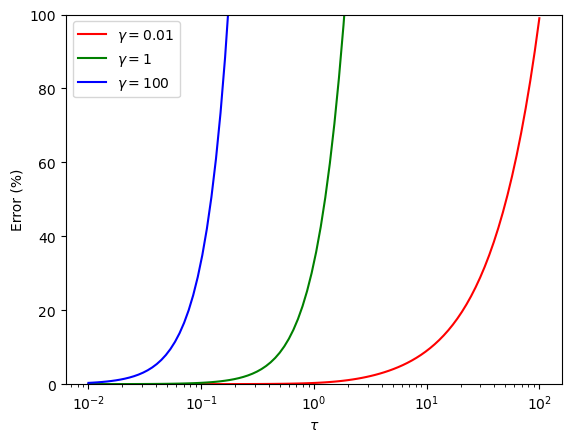

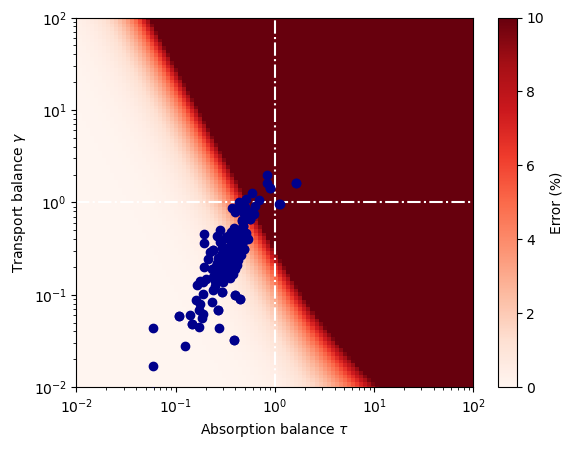

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 



N = 100
gammas = np.exp(np.linspace(np.log(0.01), np.log(100), N))
taus = np.exp(np.linspace(np.log(0.01), np.log(100), N))
error = np.ones((N,N))

for i, gamma in enumerate(gammas):
    error[i,:] = 100*gamma*(taus/np.tanh(taus) - 1)

%cd "/home/andreasstillits/coding/Leaves1D/data/saved_data"

df = pd.read_csv("Knauer2022_hypostomatous.csv", decimal=',', sep=';')


plt.plot(taus, error[0,:], 'r-', label=r'$\gamma=0.01$')
plt.plot(taus, error[int(N/2),:], 'g-', label=r'$\gamma=1$')
plt.plot(taus, error[-1,:], 'b-', label=r'$\gamma=100$')
plt.xscale('log')
plt.ylim(0, 100)
plt.xlabel(r'$\tau$')
plt.ylabel('Error (%)')
plt.legend()
plt.show()

map = plt.pcolor(taus, gammas, error, shading="nearest", cmap="Reds", vmin=0, vmax=10)
plt.plot([1, 1], [0.01, 100], 'w-.', zorder=2)
plt.plot([0.01, 100], [1, 1], 'w-.', zorder=2)
plt.scatter(df['tau'], df['gamma'], color="darkblue", marker="o", zorder=3)
plt.xscale('log')
plt.yscale('log')
plt.ylim(0.01, 100)
plt.xlim(0.01, 100)
plt.colorbar(map, label='Error (%)')
plt.xlabel(r'Absorption balance $\tau$')
plt.ylabel(r'Transport balance $\gamma$')
plt.show()
